<a href="https://colab.research.google.com/github/TurnOffYourScreen/TestGit/blob/main/activity06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Animal statistics

We are given a dataset containing information about various animals. We will use a scatter plot to show correlation between animal attributes within the dataset. 

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# importing the necessary dependencies
# data uploading

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':"1dhhf5agH-zJ-4oL6TEnVduhQx4yjmgQE"})   # replace the id with id of file you want to access
downloaded.GetContentFile('anage_data.csv')  

In [2]:
# Load dataset
data = pd.read_csv('anage_data.csv')

In [3]:
data.head(5)

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Sort the data according to the animal class.

In [4]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
# Sort according to class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

In [6]:
np.isfinite(data[longevity])

11      True
19      True
29      True
53      True
78      True
        ... 
3175    True
3181    True
3187    True
3302    True
3325    True
Name: Maximum longevity (yrs), Length: 546, dtype: bool

In [7]:
data.head(5)

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
11,11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,...,NaN,36.0,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.0
19,19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,...,NaN,10.0,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.0
29,29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,...,NaN,24.8,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.0
53,53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,...,NaN,7.8,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.5
78,78,85,Animalia,Chordata,Amphibia,Anura,Pipidae,Xenopus,laevis,African clawed frog,...,NaN,30.3,captivity,large,acceptable,NaN,NaN,0.01200,63.60,288.0


Create a scatter plot visualizing the correlation between the body mass and the maximum longevity. Use different colors for grouping data samples according to their class. Add a legend, labels and a title. Use a log scale for both the x-axis and y-axis.

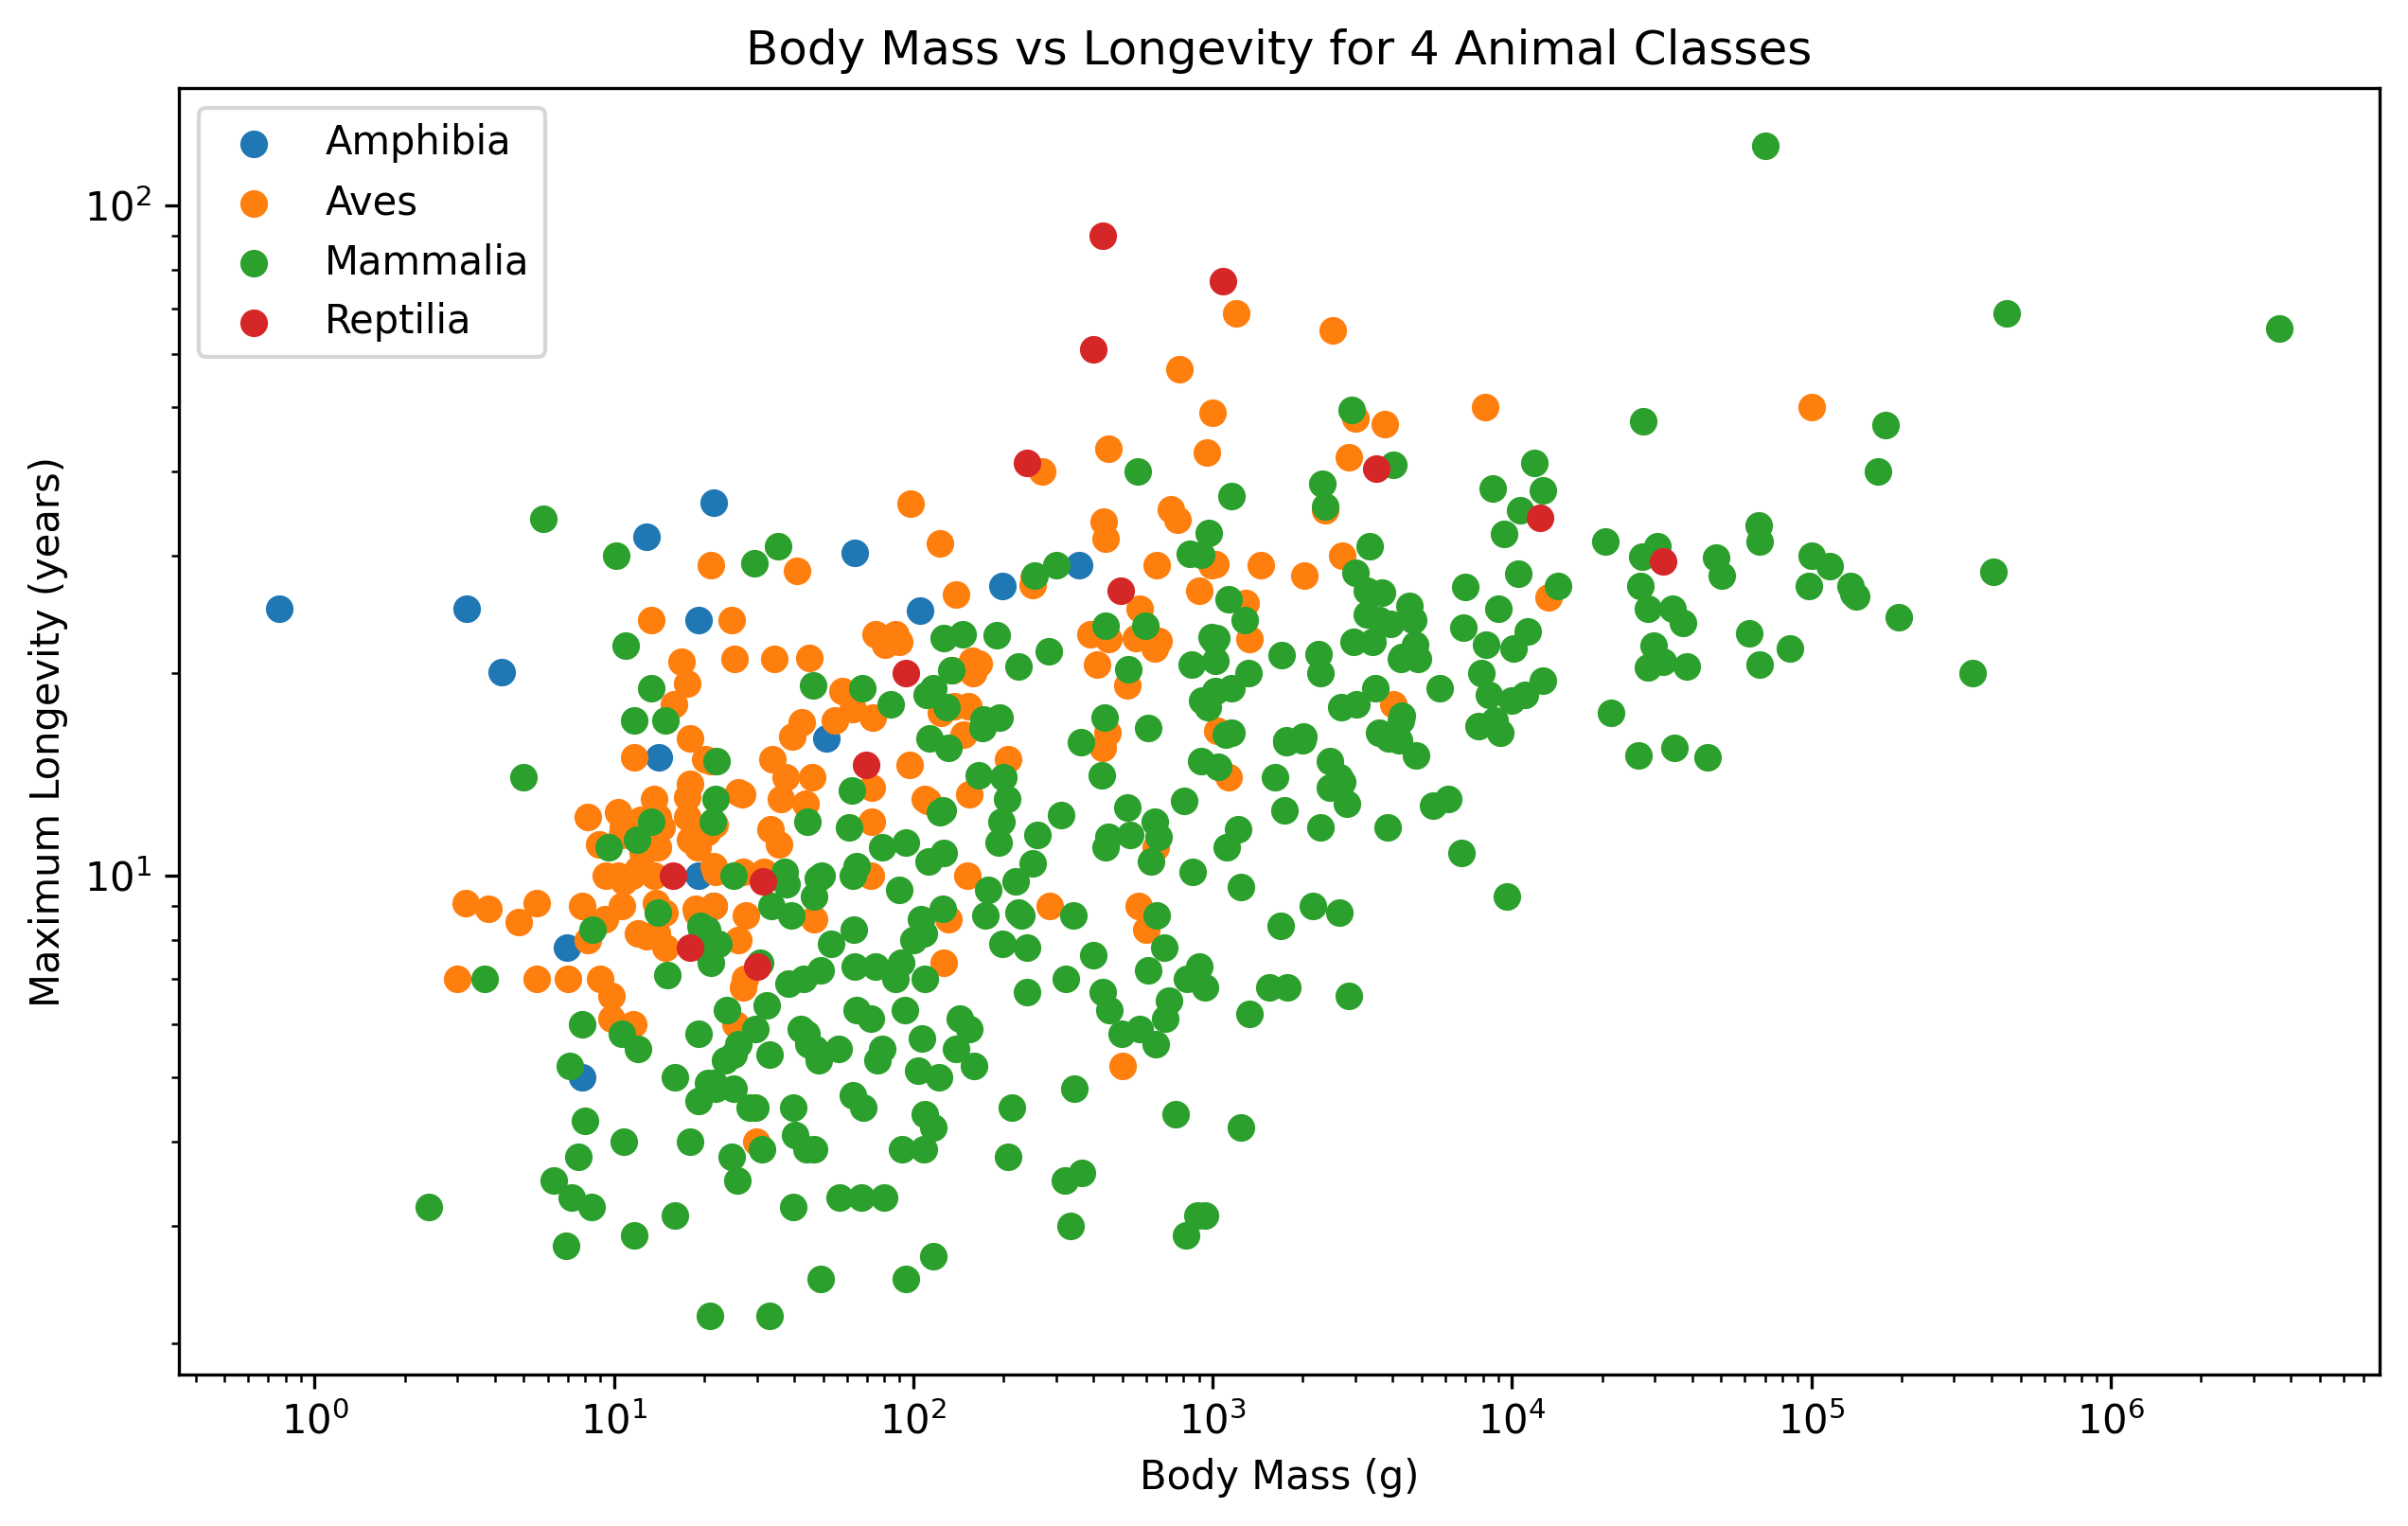

In [9]:
# Create figure
plt.figure(figsize=(10, 6), dpi=300)

# Create scatter plot - Four Different types (amphibia, aves, mammalia, reptilia) - First example given
plt.scatter(amphibia[mass], amphibia[longevity], label='Amphibia')
plt.scatter(aves[mass], aves[longevity], label = 'Aves')
plt.scatter(mammalia[mass], mammalia[longevity], label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], label = 'Reptilia')

# Add legend
plt.legend()

# Log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# Add labels
plt.xlabel('Body Mass (g)')
plt.ylabel('Maximum Longevity (years)')
plt.title('Body Mass vs Longevity for 4 Animal Classes')

# Show plot
plt.show()